#### Hier analysiere ich die bereinigten FIFA 21 Daten. Ich möchte interessante Erkenntnisse über Spieler, Teams und Marktwerte finden.

#### Importiere benötigte Bibliotheken

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

### Setze grundlegende Plot-Einstellungen

In [97]:
sns.set_theme()  # Seaborn Theme aktivieren
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['figure.dpi'] = 100
pd.set_option('display.max_columns', None)

### Entspanntere Darstellung: in Jupyter

In [98]:
%matplotlib inline
pd.set_option('display.max_columns', None)

### Bereinigte Daten laden

In [99]:
df = pd.read_csv('../data/processed/fifa21_bereinigt.csv')
print(f"Datensatz hat {df.shape[0]} Zeilen und {df.shape[1]} Spalten")

Datensatz hat 18944 Zeilen und 107 Spalten


In [100]:
display(df.head())

,sofifa_id,player_url,short_name,long_name,age,dob,nationality,club_name,league_name,league_rank,overall,potential,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,Groesse_cm,Gewicht_kg,Marktwert_EUR,Gehalt_EUR,Ausstiegsklausel_EUR,Beitrittsdatum
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,33,1987-06-24,Argentina,FC Barcelona,Spain Primera Division,1.0,93,93,"RW, ST, CF",Left,5,4,4,Medium/Low,Messi,Yes,"#Dribbler, #Distance Shooter, #FK Specialist, ...",CAM,10.0,NaN,2004-07-01,2021.0,RW,10.0,85.0,92.0,91.0,95.0,38.0,65.0,0.0,0.0,0.0,0.0,0.0,0.0,"Finesse Shot, Long Shot Taker (AI), Speed Drib...",85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,0.0,35,24,6,11,15,14,8,89+3,89+3,89+3,92+0,93+0,93+0,93+0,92+0,93+0,93+0,93+0,91+2,87+3,87+3,87+3,91+2,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3,170,72,67500000,560000,138400000.0,2004-07-01
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35,1985-02-05,Portugal,Juventus,Italian Serie A,1.0,92,92,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,"#Aerial Threat, #Dribbler, #Distance Shooter, ...",LS,7.0,NaN,2018-07-10,2022.0,LS,7.0,89.0,93.0,81.0,89.0,35.0,77.0,0.0,0.0,0.0,0.0,0.0,0.0,"Power Free-Kick, Flair, Long Shot Taker (AI), ...",84,95,90,82,86,88,81,76,77,92,87,91,87,95,71,94,95,84,78,93,63,29,95,82,84,95,0.0,32,24,7,11,15,14,11,91+1,91+1,91+1,89+0,91+0,91+0,91+0,89+0,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3,187,83,46000000,220000,75900000.0,2018-07-10
2,200389,https://sofifa.com/player/200389/jan-oblak/210002,J. Oblak,Jan Oblak,27,1993-01-07,Slovenia,Atlético Madrid,Spain Primera Division,1.0,91,93,GK,Right,3,3,1,Medium/Medium,PLAYER_BODY_TYPE_259,Yes,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,0.0,0.0,0.0,0.0,0.0,0.0,87.0,92.0,78.0,90.0,52.0,90.0,"GK Long Throw, Comes For Crosses",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,0.0,12,18,87,92,78,90,90,33+3,33+3,33+3,32+0,35+0,35+0,35+0,32+0,38+3,38+3,38+3,35+3,38+3,38+3,38+3,35+3,32+3,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3,188,87,75000000,125000,159400000.0,2014-07-16
3,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,31,1988-08-21,Poland,FC Bayern München,German 1. Bundesliga,1.0,91,91,ST,Right,4,4,4,High/Medium,PLAYER_BODY_TYPE_276,Yes,"#Distance Shooter, #Clinical Finisher",ST,9.0,NaN,2014-07-01,2023.0,NaN,0.0,78.0,91.0,78.0,85.0,43.0,82.0,0.0,0.0,0.0,0.0,0.0,0.0,"Solid Player, Finesse Shot, Outside Foot Shot,...",71,94,85,84,89,85,79,85,70,88,77,78,77,93,82,89,84,76,86,85,81,49,94,79,88,88,0.0,42,19,15,6,12,8,10,89+2,89+2,89+2,85+0,87+0,87+0,87+0,85+0,85+3,85+3,85+3,83+3,79+3,79+3,79+3,83+3,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3,184,80,80000000,240000,132000000.0,2014-07-01
4,190871,https://sofifa

## 1. Analyse der Spieler-Marktwerte

In [101]:
print("\n=== Analyse der Spieler-Marktwerte ===")


=== Analyse der Spieler-Marktwerte ===


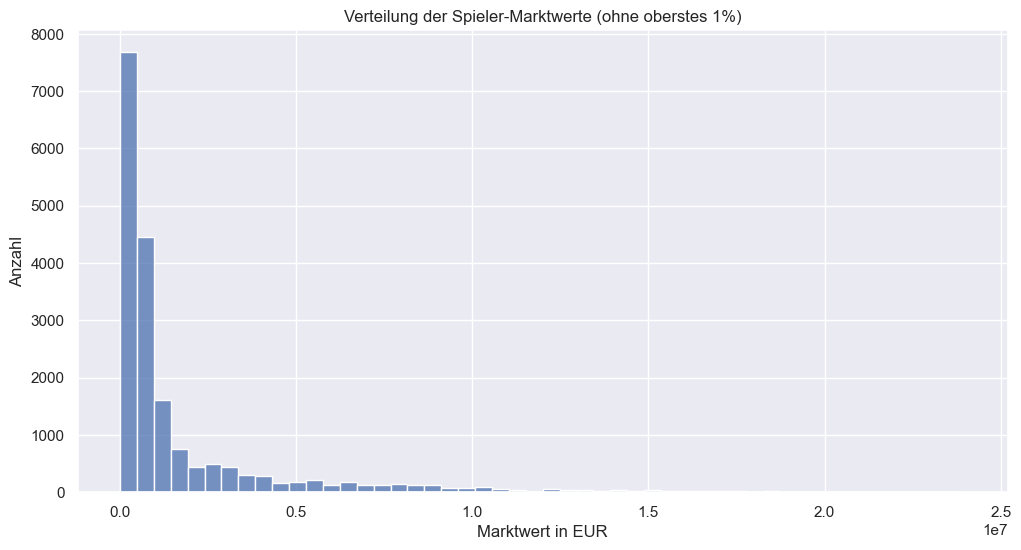

In [102]:
plt.figure(figsize=(12, 6))
# Ich nehme die obersten 1% raus, damit man die Verteilung besser sieht
sns.histplot(data=df[df['Marktwert_EUR'] < df['Marktwert_EUR'].quantile(0.99)], 
             x='Marktwert_EUR', bins=50)
plt.title('Verteilung der Spieler-Marktwerte (ohne oberstes 1%)')
plt.xlabel('Marktwert in EUR')
plt.ylabel('Anzahl')
plt.show()


### Top 10 wertvollste Spieler

In [103]:
print("\nDie 10 wertvollsten Spieler:")
wert_spalten = ['Name', 'Age', 'Team', 'Marktwert_EUR', 'Overall']
display(df.nlargest(10, 'Marktwert_EUR')[wert_spalten])


Die 10 wertvollsten Spieler:


KeyError: "['Name', 'Age', 'Team', 'Overall'] not in index"

## 2. Altersanalyse


=== Altersanalyse ===


<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

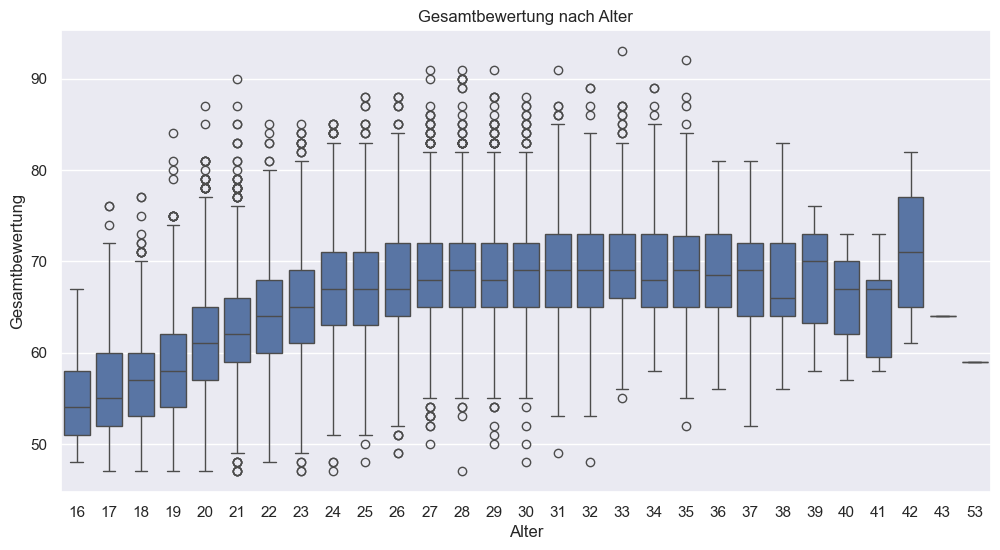

In [ ]:
print("\n=== Altersanalyse ===")

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='age', y='overall')
plt.title('Gesamtbewertung nach Alter')
plt.xlabel('Alter')
plt.ylabel('Gesamtbewertung')
plt.show()

## Durchschnittswerte nach Altersgruppen

In [ ]:
df['Altersgruppe'] = pd.cut(df['age'], 
                           bins=[0, 20, 25, 30, 35, 100], 
                           labels=['Unter 20', '20-25', '26-30', '31-35', 'Über 35'])

alters_statistik = df.groupby('Altersgruppe').agg({
    'overall': 'mean',
    'Marktwert_EUR': 'mean',
    'Gehalt_EUR': 'mean'
}).round(2)

/var/folders/v8/sjdmnzl54fn3997hxg94053r0000gn/T/ipykernel_8511/3507867379.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  alters_statistik = df.groupby('Altersgruppe').agg({


In [ ]:
print("\nDurchschnittswerte nach Altersgruppen:")
display(alters_statistik)


Durchschnittswerte nach Altersgruppen:


,overall,Marktwert_EUR,Gehalt_EUR
Altersgruppe,,,
Unter 20,59.07,860888.01,2676.57
20-25,65.19,2276495.55,7511.37
26-30,68.48,3052087.68,12322.37
31-35,69.35,2285212.33,12299.37
Über 35,68.30,569146.89,5418.36


## 3. Team-Analyse

In [ ]:
print("\n=== Team-Analyse ===")


=== Team-Analyse ===


In [ ]:
# Top 10 Teams nach durchschnittlichem Spielerwert
team_statistik = df.groupby('club_name').agg({
    'Marktwert_EUR': 'mean',
    'overall': 'mean',
    'age': 'mean'
}).round(2)


In [ ]:
print("\nTop 10 Teams nach durchschnittlichem Spielerwert:")
display(team_statistik.nlargest(10, 'Marktwert_EUR'))


Top 10 Teams nach durchschnittlichem Spielerwert:


,Marktwert_EUR,overall,age
club_name,,,
FC Bayern München,27713636.36,81.05,25.23
Liverpool,25473484.85,78.58,25.00
Real Madrid,23776562.50,79.25,24.91
Manchester City,22644696.97,77.48,24.64
FC Barcelona,21884848.48,78.91,24.85
Paris Saint-Germain,20885344.83,76.79,24.48
Chelsea,18250757.58,79.21,25.58
Atlético Madrid,17651515.15,77.18,24.79
Tottenham Hotspur,17318939.39,77.24,24.88


## 4. Positionsanalyse - Überarbeitet

In [ ]:
print("\n=== Positionsanalyse ===")


=== Positionsanalyse ===


### Durchschnittswerte nach Position

In [ ]:
positions_mapping = {
    'GK': 'Torwart',
    'CB': 'Verteidigung', 'LB': 'Verteidigung', 'RB': 'Verteidigung', 'LWB': 'Verteidigung', 'RWB': 'Verteidigung',
    'CDM': 'Mittelfeld', 'CM': 'Mittelfeld', 'CAM': 'Mittelfeld',
    'LM': 'Außenbahn', 'RM': 'Außenbahn', 'LW': 'Außenbahn', 'RW': 'Außenbahn',
    'ST': 'Sturm', 'CF': 'Sturm'
}

#### Neue Spalte mit Hauptpositionen erstellen

In [ ]:
df['Hauptposition'] = df['player_positions'].map(positions_mapping)

#### Durchschnittswerte nach Hauptposition berechnen

In [ ]:
positions_statistik = df.groupby('Hauptposition').agg({
    'Marktwert_EUR': 'mean',
    'overall': 'mean',
    'age': 'mean'
}).round(2)

##### Übersichtlichere Visualisierung erstellen

<Figure size 1000x600 with 0 Axes>

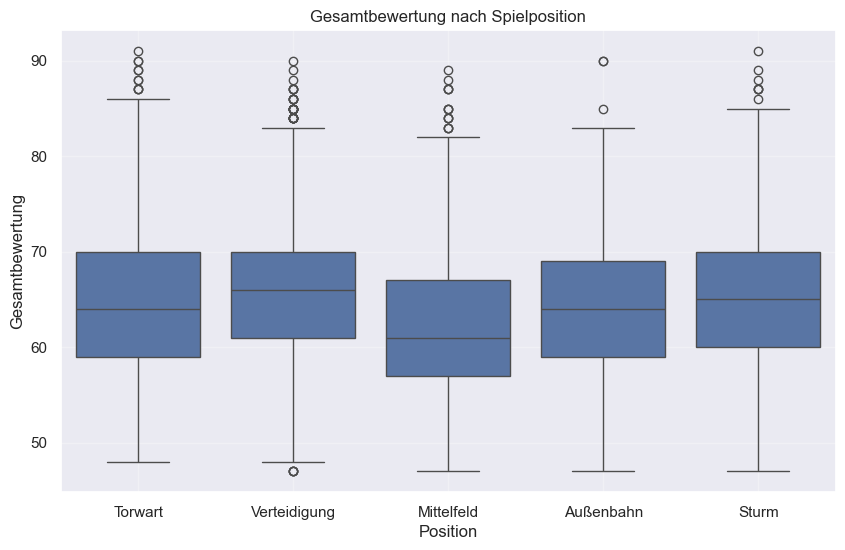

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Hauptposition', y='overall', order=['Torwart', 'Verteidigung', 'Mittelfeld', 'Außenbahn', 'Sturm'])
plt.title('Gesamtbewertung nach Spielposition')
plt.xlabel('Position')
plt.ylabel('Gesamtbewertung')
plt.grid(True, alpha=0.3)
plt.show()

#### Durchschnittswerte

In [ ]:
print("\nDurchschnittliche Werte nach Position:")
display(positions_statistik)


Durchschnittliche Werte nach Position:


,Marktwert_EUR,overall,age
Hauptposition,,,
Außenbahn,2223134.82,64.09,23.52
Mittelfeld,1577995.80,62.00,23.30
Sturm,2206077.04,64.94,25.27
Torwart,1662274.60,64.56,26.25
Verteidigung,1987426.89,65.66,25.49


## 5. Korrelationsanalyse

In [ ]:
print("\n=== Korrelationsanalyse ===")


=== Korrelationsanalyse ===


#### Numerische Spalten für Korrelation auswählen

In [ ]:
numerische_spalten = ['overall', 'age', 'Groesse_cm', 'Gewicht_kg', 'Marktwert_EUR', 'Gehalt_EUR']
korrelationsmatrix = df[numerische_spalten].corr()

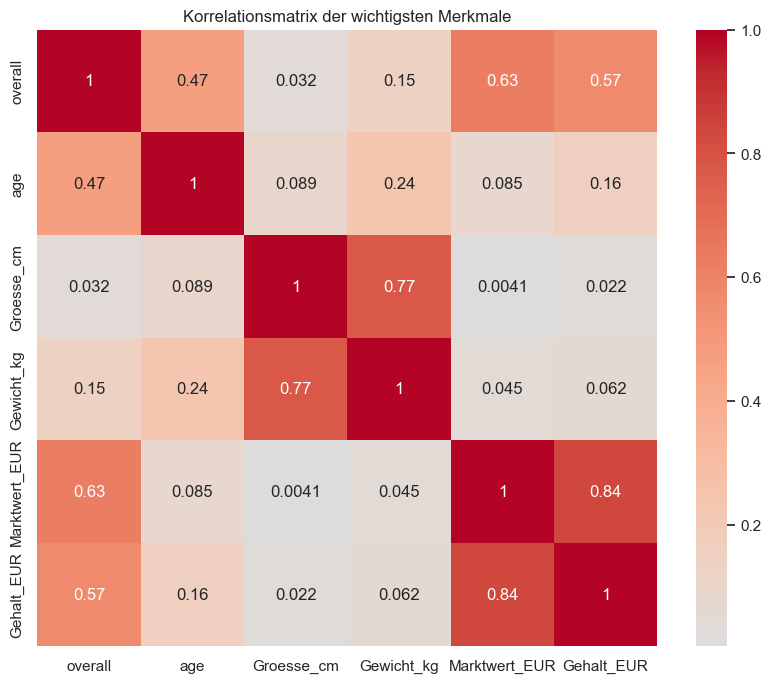

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(korrelationsmatrix, annot=True, cmap='coolwarm', center=0)
plt.title('Korrelationsmatrix der wichtigsten Merkmale')
plt.show()

## 6. Vertragsanalyse

In [ ]:
print("\n=== Vertragsanalyse ===")


=== Vertragsanalyse ===


#### Vertragslängenverteilung

#### Bereinige die Vertragsjahre (nur die Jahreszahl extrahieren)

In [ ]:
def extrahiere_jahr(datum_str):
    try:
        if pd.isna(datum_str):
            return np.nan
        return int(str(datum_str)[:4])  # Nimm nur die ersten 4 Zeichen (Jahr)
    except:
        return np.nan

#### Berechne Start- und Endjahr

In [ ]:
df['Vertrag_Start_Jahr'] = df['joined'].apply(extrahiere_jahr)
df['Vertrag_End_Jahr'] = df['contract_valid_until'].apply(extrahiere_jahr)

#### Berechne Vertragslänge (nur für gültige Werte)

In [ ]:
df['Vertragslänge'] = df['Vertrag_End_Jahr'] - df['Vertrag_Start_Jahr']

#### Filtere ungültige Werte raus

In [ ]:
gueltige_vertraege = df[df['Vertragslänge'].between(0, 10)]  # Nur realistische Vertragslängen

In [104]:
plt.figure(figsize=(10, 6))
sns.histplot(data=gueltige_vertraege, x='Vertragslänge', bins=10)
plt.title('Verteilung der Vertragslängen')
plt.xlabel('Vertragslänge in Jahren')
plt.ylabel('Anzahl der Spieler')
plt.grid(True, alpha=0.3)

#### Durchschnittslinie hinzufügen

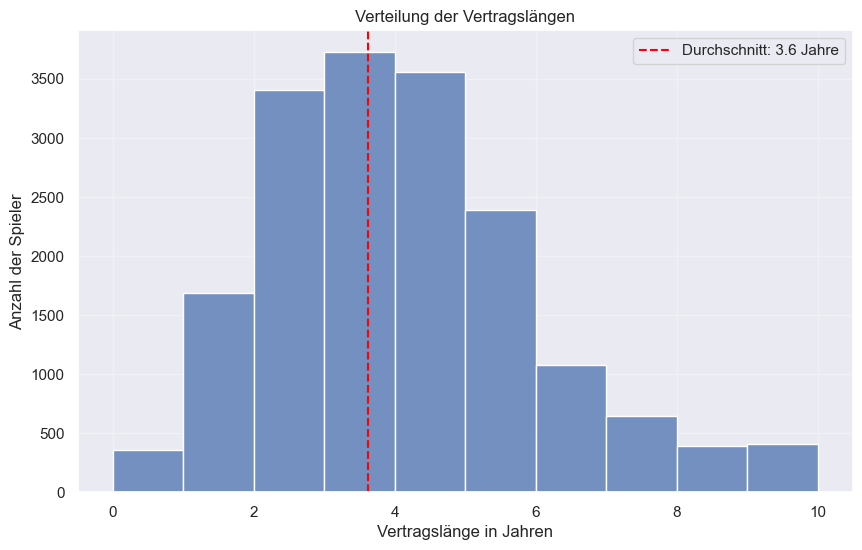

In [105]:
plt.axvline(gueltige_vertraege['Vertragslänge'].mean(), 
            color='red', 
            linestyle='--', 
            label=f'Durchschnitt: {gueltige_vertraege["Vertragslänge"].mean():.1f} Jahre')
plt.legend()
plt.show()

### Statistiken zu Vertragslängen:

In [107]:
print(f"Durchschnittliche Vertragslänge: {gueltige_vertraege['Vertragslänge'].mean():.1f} Jahre")
print(f"Häufigste Vertragslänge: {gueltige_vertraege['Vertragslänge'].mode().iloc[0]} Jahre")
print(f"Minimale Vertragslänge: {gueltige_vertraege['Vertragslänge'].min()} Jahre")
print(f"Maximale Vertragslänge: {gueltige_vertraege['Vertragslänge'].max()} Jahre")

Durchschnittliche Vertragslänge: 3.6 Jahre
Häufigste Vertragslänge: 3.0 Jahre
Minimale Vertragslänge: 0.0 Jahre
Maximale Vertragslänge: 10.0 Jahre
